### Hypothesis Testing

Hypothesis testing is simply a claim made to prove our point. The assumption we make to prove the claim through statistical measures and most importantly, by **REJECTING THE NULL HYPOTHESIS**

For example:

In TV series "Breaking Bad", Walter White claiming, the meth is 99.9% pure. This can be termed as a hypothesis. In order to prove this, we first have to conduct test so that we can agree on Walter's assumption. Therefore, Jesse pinkman generates a test for the same. 

Let us assume Jesse will be profitable if the meth is more than 95% pure

* First assumption or NULL Hypothesis: The meth is less than or equal to 95% pure

* Second assumption or opposite to the claim assumption is: The meth is greater than 95% pure

Well, let's assume we are jesse pinkman (a character from breaking bad), who has to decide if Walter is correct or not.

**Hence, Jesse will come up with two hypothesis in a statistical manner as he wants to make profit based on his business. He then introduced two parameters as H0 (Null Hypothesis) and Ha (Alternate Hypothesis).**

<img src="jesse.png" alt= “” width="800" height="500">

**Statistics Jargon**

Hypothesis testing in statistics is a way for you to test the results of a survey or experiment to see if you have meaningful results. You’re basically testing whether your results are valid by figuring out the odds that your results have happened by chance. If your results may have happened by chance, the experiment won’t be repeatable and so has little use.



### Finally, this is our hypothesis 

### H0 - Purity of Meth <= 95%
### Ha - Purity of Meth > 95%

In [81]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# stats library
import scipy.stats as st

In [59]:
# Let's say Jesse took some samples and noticed percentage of purity coming as the following..
sample_units_size = 20
percentages_of_purity = np.array([87, 88, 90, 91, 92, 93, 94, 94, 95, 
                                  96, 97, 97, 98, 98, 99, 99, 99, 99, 100, 100])

We now have our mean and standard deviation of sample

In [60]:
mean_of_sample = percentages_of_purity.mean()
std_dev = percentages_of_purity.std()
mean_of_sample, std_dev

(95.3, 3.9255572852781047)

### Importing Libraries

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
data = percentages_of_purity
mean = np.mean(data)
std_dev = np.std(data)

In [51]:
# We check how many data points actually lie beyond 95%..
filtered_list = [data for data in percentages_of_purity if data < 95]

In [54]:
(len(filtered_list)/len(data)) * 100

40.0

#### Analysis:
40% of our data points are actually lying beyond 95%. This can mean that even though our mean value is 95.3, we can get a much higher p value. Lets check..

In [57]:
# Formulating our hypothesis...
st.ttest_1samp(percentages_of_purity,95,alternative='greater')

Ttest_1sampResult(statistic=0.33311695334731267, pvalue=0.37134689315519337)

**Our p-value comes out to be 0.37. Hence, our analaysis seems to be correct so as to prove why is this happening**


#### Conclusion

We fail to reject the null hypothesis, and therefore this means we would need more evidence or samples to conclude that the meth is more than 95% pure. Hence, we cannot reject the null hypothesis and Jesse cannot sell this into the market until he conducts more tests.

<img src="jesse-frustrated.png" alt= “” width="500" height="300">

#### Let's look further into p-values and their usage in regression

### Importance of p-values in Regression

### Importing Libraries

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

### Reading data

Link to data: https://github.com/amay1212/amay-trivedi/blob/master/data/reg_dummy_explaination.csv

In [169]:
data = pd.read_csv('reg_dummy_explaination.csv')

In [130]:
data.head()

,exp,salary,gender
0,2.0,350000,F
1,2.0,360000,M
2,4.0,400000,F
3,4.0,900000,M
4,5.6,450000,F


## Solution Process starts from here

In [131]:
df= data.copy()

In [132]:
df.head()

,exp,salary,gender
0,2.0,350000,F
1,2.0,360000,M
2,4.0,400000,F
3,4.0,900000,M
4,5.6,450000,F


Plotting the experience and salary and checking data distribution

### Basic EDA

In [133]:
def plot_distribution_scatter(df, x, y, hue=None):
    sns.scatterplot(data=df, x=x, y=y,hue=hue)

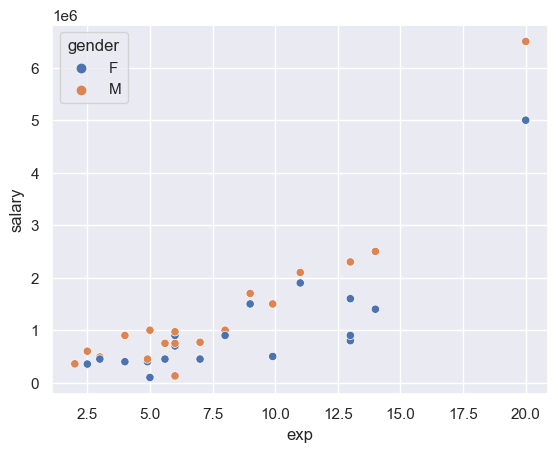

In [134]:
plot_distribution_scatter(df, df.exp, df.salary, df.gender)

#### Plotting only Gender and Salary, so as to confirm with our P-value later on

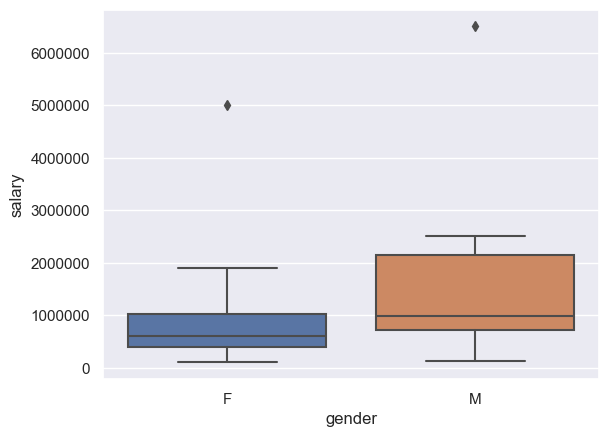

In [168]:
sns.boxplot(x = 'gender', y = df.salary, data=df)
plt.ticklabel_format(style='plain', axis='y')

Seems like salaries of males are greater than female's

In [135]:
# Checking the difference between the salaries..
#df.head()
grouped_by_gender = df.groupby('gender')
grouped_by_gender['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,20.0,958750.0,1.076212e+06,100000.0,400000.0,600000.0,1025000.0,5000000.0
M,20.0,1478500.0,1.406351e+06,130000.0,712500.0,985000.0,2150000.0,6500000.0


In [136]:
male_salary = grouped_by_gender['salary'].mean()[1]
female_salary = grouped_by_gender['salary'].mean()[0]
difference = male_salary - female_salary
print(f'Difference in salaries = {difference}')

Difference in salaries = 519750.0


#### Separating out the independent and dependent variable

In [137]:
df.head()

,exp,salary,gender
0,2.0,350000,F
1,2.0,360000,M
2,4.0,400000,F
3,4.0,900000,M
4,5.6,450000,F


In [138]:
x1 = df.iloc[:, [0,2]]
y = df.iloc[:, 1]

In [139]:
y.head()

0    350000
1    360000
2    400000
3    900000
4    450000
Name: salary, dtype: int64

In [141]:
x1.head()

,exp,gender
0,2.0,F
1,2.0,M
2,4.0,F
3,4.0,M
4,5.6,F


#### Adding constant to x1 data as per stats models library

In [142]:
X = sm.add_constant(x1)

In [143]:
X.head()

,const,exp,gender
0,1.0,2.0,F
1,1.0,2.0,M
2,1.0,4.0,F
3,1.0,4.0,M
4,1.0,5.6,F


#### Converting 'gender' column to dummy variables 

In [144]:
X.head()

,const,exp,gender
0,1.0,2.0,F
1,1.0,2.0,M
2,1.0,4.0,F
3,1.0,4.0,M
4,1.0,5.6,F


In [145]:
# This will first convert the gender into one hot encoded form for ex:
# 0 for male, 1 for female
# After that, it will sort the desired new columns in alphabetical order
# drop_first=True, Female gender dummy variable will be dropped as it 'F' in Female comes before 'M' in Male
X = pd.get_dummies(X, drop_first=True)

In [146]:
X.head()

,const,exp,gender_M
0,1.0,2.0,0
1,1.0,2.0,1
2,1.0,4.0,0
3,1.0,4.0,1
4,1.0,5.6,0


#### Fitting the stats model (OLS)

In [147]:
model = sm.OLS(endog=y, exog=X).fit()

In [148]:
#model=sm.OLS(y,X).fit()

In [149]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     51.24
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           2.18e-11
Time:                        08:48:37   Log-Likelihood:                -591.70
No. Observations:                  40   AIC:                             1189.
Df Residuals:                      37   BIC:                             1194.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.895e+05    2.4e+05     -3.701      0.001   -1.38e+06   -4.03e+05
exp         2.269e+05   2.31e+04      9.819      0.000     1.8e+05    2.74e+05
gender_M    5.084e+05   2.11e+05      2.406      0.021    8.02e+04    9.37e+05
==============================================================================
Omnibus:                       14.748   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.336
Skew:                           1.015   Prob(JB):                     2.33e-05
Kurtosis:                       5.946   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The above says P values in dummy variable is less then 0.05 so it is signifincant. The way it is interpreted as  the salary of males is 5.084e+05 (508400) more than female given the experence is same

#### Following are the Hypothesis for each of our variables..

Feature - Experience

* Null Hypothesis: There is no change in salary with change in experience

* Alternate Hypothesis: There is strong linear relationship between experience and salary

* P-value Analysis: The P-value comes out to be 0.000, which is less than our significance level 0.05. Hence, this proves that there is a strong relationship between exp and salary which was also concluded by our EDA scatter plot analyis above.

Conclusion: We can reject null hypothesis with evidence. Therefore, exp is strong indicator for predicting our salary.

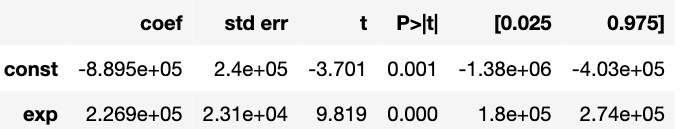

In [183]:
cap.show()

#### Following are the Hypothesis for each of our variables..

Feature - Gender_M (categorical feature with 0 and 1 value)

* (H0) Null Hypothesis: The gender does not have any impact on salary

* (Ha) Alternate Hypothesis: There is a strong relationship between gender and salary.

The above two hypothesis have another nested hypothesis, which gets finer information about Male and Female salary in particular. Let's name it H01 and Ha01

* H01 * - Whether it is a male or female, the salary is not gonna get impacted by gender.
* Ha01 - The salary is gonna be different for males and females.

* P-value Analysis: The P-value comes out to be 0.021 from the plot above, which is less than our significance level 0.05. Hence, this proves that there is a strong relationship between gender_M(Male Gender) and salary which was also concluded by our EDA scatter plot analyis above.

Conclusion: We can reject null hypothesis with evidence that 

1. Salaries are affected by gender
2. There would be a difference in salaries for male and female.

#### Dry run of our linear regression model

In [174]:
exp = 15
gender_M = 0 #(female)

In [175]:
# forming equation by rounding off some numbers..
female_salary = 2*exp + 5*gender_M - 8.8

gender_M = 1 #(male)

male_salary = 2*exp + 5*gender_M - 8.8

In [176]:
female_salary, male_salary

(21.2, 26.2)

#### Conclusion:

*Difference of 5 units is observed in Male's salary and Female's salary.*